In [1]:
try:
    import anastruct, openturns, numba, joblib
except:
    import os
    if os.sys.platform == 'linux' :
        file_path = 'sensitivityEnv.yml'
        os.system('conda env create -f'+file_path)
        # to have the right modules installed
        print('now activate the environment and restart jupyter with other kernel')
    else :
        print('Do it alone')

In [2]:
import NdGaussianProcessSensitivity_MOD as ngps
import NdGaussianProcessConstructor as ngpc
# Classes utilitaires
import numpy                        as np
import openturns                    as ot
import matplotlib.pyplot            as plt
from   importlib                import reload 

# on importe aussi les fonctions à étudier
import RandomBeamGenerationClass    as rbgc

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

trend function args:  ['x']  trend function:  210000 

Please be aware that the number of elements in the argument list has to be the same as the dimension of the process:  1
trend function args:  ['x']  trend function:  10 

Please be aware that the number of elements in the argument list has to be the same as the dimension of the process:  1
Populating the interactive namespace from numpy and matplotlib


In [3]:
# process governing the young modulus for each element      (MPa)
process_E = ngpc.NdGaussianProcessConstructor(dimension=1,
                                              grid_shape=[[0,1000,100],],
                                              covariance_model={'NameModel':'MaternModel',
                                                                'amplitude':5000.,
                                                                'scale':300,
                                                                'nu':13/3},
                                              trend_arguments=['x'],trend_function=210000)
process_E.setName('E_')


# process governing the diameter for each element          (mm)
process_D = ngpc.NdGaussianProcessConstructor(dimension=1,
                                              grid_shape=[[0,1000,100],],
                                              covariance_model={'NameModel':'MaternModel',
                                                                'amplitude':.3,
                                                                'scale':250,
                                                                'nu':7.4/3},
                                              trend_arguments=['x'],trend_function=10)
process_D.setName('D_')


# random variable for the density of the material (kg/m³)
rho         = 7850.
sigma       = 250
nameD       = 'Rho'
RV_Rho = ngpc.NormalDistribution(mu = rho, sigma = sigma, name = nameD)


# random variable for the position of the force   (mm) 
middle       = 500
sigma_f      = 50
namePos     = 'FP'
RV_Fpos = ngpc.NormalDistribution(mu = middle, sigma = sigma_f, name = namePos)


# random variable for the norm of the force    (N)
muForce       = 100
# we go from sigma = 15 to sigma = 1.5, as the influence is too important
sigma_Fnor    = 1.5
nameNor       = 'FN'
RV_Fnorm = ngpc.NormalDistribution(mu = muForce, sigma = sigma_Fnor, name = nameNor)

trend function args:  ['x']  trend function:  210000 

Please be aware that the number of elements in the argument list has to be the same as the dimension of the process:  1
trend function args:  ['x']  trend function:  10 

Please be aware that the number of elements in the argument list has to be the same as the dimension of the process:  1


In [4]:
from importlib import reload
reload(ngps)
outputVariables = {'out1' :
                   {
                         'name'     : 'VonMisesStress',
                         'position' : 0,
                         'shape'    : (102,)  
                    },
                   'out2' :
                   {
                        'name'      : 'maxDeflection',
                        'position'  : 1,
                        'shape'     : (1,)
                   }
                  }
#Pour utiliser notre fonction, un wrapper a été spécialement écrit pour faciliter l'accès aux fonctions mais
#ce choix est entièrement dépendant de la manière dont a été définie la fonction sur laquelle vous travaillez.
functionWrapper = rbgc.sampleAndSoloFunctionWrapper(process_E, process_D, RV_Rho, RV_Fpos, RV_Fnorm)


In [6]:
inputVarList = [process_E, process_D, RV_Rho, RV_Fpos, RV_Fnorm]
# We also the need the two functions of the model (one for samples, the other for single evaluations)
# In our case, as our model is defined as a class, we have to first create the model, 
# but it also could just be just two functions taking as an input the fields and RVs
soloFunction   = functionWrapper.randomBeamFunctionSolo
sampleFunction = functionWrapper.randomBeamFunctionSample
##
size           = 10000 ## Number of samples for our sobol indicies experiment (kept low here to make things faster)
##
reload(ngps)
##
processSensitivityAnalysis = ngps.NdGaussianProcessSensitivityAnalysis(inputVarList, 
                                                                       outputVariables,
                                                                       sampleFunction,
                                                                       soloFunction,
                                                                       size)

Input Variables are (without Karhunen Loeve Decomposition) :
 ['E_', 'D_', 'Rho', 'FP', 'FN'] 

Output Variables are :
 ['VonMisesStress', 'maxDeflection'] 

trend function args:  ['x']  trend function:  210000 

Please be aware that the number of elements in the argument list has to be the same as the dimension of the process:  1
trend function args:  ['x']  trend function:  10 

Please be aware that the number of elements in the argument list has to be the same as the dimension of the process:  1


In [7]:
processSensitivityAnalysis.prepareSobolIndicesExperiment()

Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)
number of samples for sobol experiment =  70000 

input design is:  [[ 5.61299588e+01 -3.62610846e-01  2.34431593e+01 ...  8.08531372e+03
   4.44238030e+02  1.01956377e+02]
 [ 5.56365103e+01 -4.00022375e-02  2.29372180e+01 ...  7.70515944e+03
   5.91024860e+02  1.01433002e+02]
 [ 5.47623277e+01 -6.18084560e-01  2.40932585e+01 ...  7.84152701e+03
   5.39347817e+02  1.02704530e+02]
 ...
 [ 5.53838192e+01  2.44978470e-01  2.45033438e+01 ...  7.65045551e+03
   5.65377459e+02  1.01008132e+02]
 [ 5.27615652e+01 -3.45988708e-01  2.18345585e+01 ...  8.17411477e+03
   5.12754280e+02  9.97154806e+01]
 [ 5.43644685e+01  1.41068948e+00  2.23454548e+01 ...  7.74376008e+03
   4.37446563e+02  9.65653002e+01]]


In [8]:
processSensitivityAnalysis.getOutputDesignAndPostprocess()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 9232 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 9369 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9506 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 9645 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 9925 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 10066 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 10209 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 10497 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 10642 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 10789 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 10936 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 11085 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 11385 tasks      |

[Parallel(n_jobs=-1)]: Done 35097 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 35362 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 35629 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 35896 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 36165 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 36434 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 36705 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 36976 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 37249 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 37522 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 37797 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 38072 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 38349 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 38626 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 38905 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 39184 tasks 

shape deflection:  (70000, 103)  should be [N,10X] something
deflection std deviation  nan
timed  2398.258866072  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (70000, 102)
Element  2  has shape  (70000,)
Final shape matrix:  (70000, 103)
Columns where nan :  [ 7318  8310  9819 10799 13453 13753 15678 16499 17417 20920 27318 29580
 29985 30920 37318 39580 39819 47318 48310 49819 50113 50156 50787 51344
 53169 53453 53753 56499 56517 57417 58531 67318 68310 69819] 

There were  34  errors (numpy.nan) while processing, trying to regenerate missing outputs 

index to change:  [ 7318 17318 27318 37318 47318 57318 67318]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.24190494370212748
timed  0.308596134  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 8310 18310 28310 38310 48310 58310 68310]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1914s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  1.6046311547080163
timed  0.296101332  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 9819 19819 29819 39819 49819 59819 69819]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1911s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.6191353879540673
timed  0.279639959  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [  799 10799 20799 30799 40799 50799 60799]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1965s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  2.1965020068867305
timed  0.286851883  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 3453 13453 23453 33453 43453 53453 63453]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  2.2485307107027133
timed  0.304225922  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 3753 13753 23753 33753 43753 53753 63753]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1915s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.3891784868938455
timed  0.276418686  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 5678 15678 25678 35678 45678 55678 65678]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.4149362533063084
timed  0.304359198  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 6499 16499 26499 36499 46499 56499 66499]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.8128189276497192
timed  0.342855215  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 7417 17417 27417 37417 47417 57417 67417]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.6695856642779956
timed  0.311692238  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [  920 10920 20920 30920 40920 50920 60920]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1825s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.7181259295403732
timed  0.30142045  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 7318 17318 27318 37318 47318 57318 67318]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1989s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  2.0336228677935
timed  0.333547115  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 9580 19580 29580 39580 49580 59580 69580]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.8760808446933689
timed  0.286774397  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 9985 19985 29985 39985 49985 59985 69985]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1883s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  1.056975718462188
timed  0.28699708  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [  920 10920 20920 30920 40920 50920 60920]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  1.2694131370192352
timed  0.28729701  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 7318 17318 27318 37318 47318 57318 67318]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.7346984681776675
timed  0.30085969  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 9580 19580 29580 39580 49580 59580 69580]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1922s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  1.5129993141408935
timed  0.286941767  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 9819 19819 29819 39819 49819 59819 69819]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.8550998026972843
timed  0.278244019  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 7318 17318 27318 37318 47318 57318 67318]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.8216425132858741
timed  0.300178289  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 8310 18310 28310 38310 48310 58310 68310]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  1.378459845074483
timed  0.307104111  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 9819 19819 29819 39819 49819 59819 69819]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1983s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.5035855307381923
timed  0.286973953  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [  113 10113 20113 30113 40113 50113 60113]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1763s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.9429333501853691
timed  0.285041571  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [  156 10156 20156 30156 40156 50156 60156]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  3.329931253736257
timed  0.29946661  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [  787 10787 20787 30787 40787 50787 60787]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1914s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.5910085281559246
timed  0.291189671  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 1344 11344 21344 31344 41344 51344 61344]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1911s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.46690330525895973
timed  0.340366602  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 3169 13169 23169 33169 43169 53169 63169]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  1.112678753529557
timed  0.297563553  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 3453 13453 23453 33453 43453 53453 63453]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  1.696881162426494
timed  0.313745737  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 3753 13753 23753 33753 43753 53753 63753]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.6394858991693586
timed  0.294585705  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 6499 16499 26499 36499 46499 56499 66499]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1869s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  1.4212455310994505
timed  0.283875465  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 6517 16517 26517 36517 46517 56517 66517]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1864s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  1.097938038262522
timed  0.290994883  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 7417 17417 27417 37417 47417 57417 67417]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1973s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.7858767551134734
timed  0.275742292  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 8531 18531 28531 38531 48531 58531 68531]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1867s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.7797703444983377
timed  0.321425915  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 7318 17318 27318 37318 47318 57318 67318]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.6265848438683868
timed  0.313908815  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 8310 18310 28310 38310 48310 58310 68310]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.4168560379449737
timed  0.296957254  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
index to change:  [ 9819 19819 29819 39819 49819 59819 69819]
Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS
Choosen generation method is Random (default)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1706s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.3s finished


shape deflection:  (7, 103)  should be [N,10X] something
deflection std deviation  0.4183380141846645
timed  0.277989388  s for function " randomBeamFunctionSample "
Converting list of outputs into matrix: 
Element  1  has shape  (7, 102)
Element  2  has shape  (7,)
Final shape matrix:  (7, 103)
 - Post replacement assertion passed - 

Transforming matrix of shape  (70000, 103)
Into list of Ndarrays according to output definition
Dimension output  0  is  102
Intermediary shape is : (70000, 102)
new shape is:  [70000, 102]
Output element  0  has shape  (70000, 102)
Dimension output  1  is  1
Intermediary shape is : (70000, 1)
new shape is:  [70000, 1]
Output element  1  has shape  (70000,)


In [9]:
import NdGaussianProcessSensitivityIndices as ngpsi
reload(ngpsi)
processSensitivityAnalysis.outputDesignList

[array([[ 1.69385858,  5.99197799, 11.52267645, ..., 14.84732942,
         10.06326972,  5.25906439],
        [ 1.33662012,  4.89266792,  9.44783856, ..., 21.60601514,
         14.71478867,  7.71052711],
        [ 1.40110464,  4.95341003,  9.5774803 , ..., 16.96957864,
         11.39684593,  5.91162061],
        ...,
        [ 1.21121088,  4.09826848,  7.81457816, ..., 15.11237083,
         10.28464245,  5.41302427],
        [ 1.35545545,  4.69049139,  9.10699828, ..., 15.43905786,
         10.44733038,  5.45664077],
        [ 1.76645994,  6.48841987, 12.48677684, ..., 12.98849951,
          8.82367731,  4.62474099]]),
 array([5.25906439, 7.71052711, 5.91162061, ..., 5.41302427, 5.45664077,
        4.62474099])]

In [10]:
output = processSensitivityAnalysis.outputDesignList
output1 = output[0]
output2 = output[1]
S, Stot = ngpsi.NdGaussianProcessSensitivityIndicesBase.getSobolIndices(output1,10000)
S2, Stot2 = ngpsi.NdGaussianProcessSensitivityIndicesBase.getSobolIndices(output2,10000)

There are 5 indices to get in (102,) dimensions with 102 elements
There are 5 indices to get in 1 dimensions with 1 elements


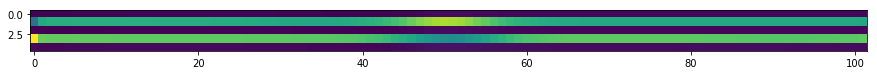

In [11]:
composedDist = processSensitivityAnalysis.wrappedFunction.KLComposedDistribution
plt.imshow(S)

In [14]:
S[...,0:5]
S2

array([0.00286095, 0.42822981, 0.00230379, 0.5474147 , 0.01373425])

In [13]:
sob = list(S2)
Sobol=list()
[Sobol.append(round(x,3)) for x in sob]

[None, None, None, None, None]

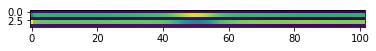

In [36]:
im = plt.imshow(S)

In [37]:
plt.show(im)

In [14]:
print(processSensitivityAnalysis.wrappedFunction.inputVarNames)
print(processSensitivityAnalysis.wrappedFunction.inputVarNamesKL)
print(processSensitivityAnalysis.wrappedFunction._inputVarOrdering)

['E_', 'D_', 'Rho', 'FP', 'FN']
['E_xi_0', 'E_xi_1', 'E_xi_2', 'E_xi_3', 'E_xi_4', 'E_xi_5', 'E_xi_6', 'E_xi_7', 'D_xi_0', 'D_xi_1', 'D_xi_2', 'D_xi_3', 'D_xi_4', 'D_xi_5', 'D_xi_6', 'D_xi_7', 'D_xi_8', 'D_xi_9', 'D_xi_10', 'D_xi_11', 'D_xi_12', 'Rho', 'FP', 'FN']
['var0', 'var1', 'var2', 'var3', 'var4']


In [12]:
import customWraps as cw

In [13]:
@cw.timing
def getLHSExperiment(distribution, size, alwaysShuffle, randomShift):
    return ot.LHSExperiment(distribution, size, alwaysShuffle, randomShift).generate()

In [14]:
exp = getLHSExperiment(composedDist, 2000, True, True)

timed  0.040719986  s for function " getLHSExperiment "


In [15]:
print('That works really fast!')
exp

That works really fast!


class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=2000 dimension=24 description=[X0,X1,X2,...,X21,X22,X23] data=[[55.7903,-0.190982,23.284,...,8005.52,484.736,101.649],[55.3335,1.37126,24.2084,...,7653.51,481.986,97.7207],[54.2023,0.871355,23.8598,...,7814.16,407.555,99.9938],...,[54.8515,-0.523946,24.2193,...,8217.19,477.841,99.5037],[54.4046,-0.329352,25.9664,...,7412.34,507.69,98.9423],[54.3466,-0.570135,24.4115,...,7878.01,402.964,99.9011]]

In [55]:
import NdGaussianProcessExperimentGeneration as ngpeg
reload(ngpeg)

<module 'NdGaussianProcessExperimentGeneration' from '/home/motherloadubu/Documents/project_PHIMECA/stochastic_process_analysis/NdGaussianProcessExperimentGeneration.py'>

In [56]:
test0 = ngpeg.NdGaussianProcessExperiment(processSensitivityAnalysis.sampleSize,
                                         processSensitivityAnalysis.wrappedFunction)

Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS


In [57]:
test0.generate()

array([[ 5.50346146e+01,  9.81992100e-02,  2.47360736e+01, ...,
         7.45248899e+03,  6.01817823e+02,  1.01293963e+02],
       [ 5.37555756e+01,  1.29455188e-01,  2.28109014e+01, ...,
         7.95669043e+03,  4.37887664e+02,  9.96609256e+01],
       [ 5.53507742e+01, -1.25225486e+00,  2.43850209e+01, ...,
         7.96235937e+03,  4.37713257e+02,  1.00149113e+02],
       ...,
       [ 5.60095120e+01,  7.35625214e-01,  2.33273992e+01, ...,
         8.07962019e+03,  5.26993032e+02,  1.00278874e+02],
       [ 5.65213904e+01,  3.75193848e-01,  2.45633504e+01, ...,
         7.82180335e+03,  5.20321230e+02,  9.79694576e+01],
       [ 5.47746640e+01,  1.08818884e+00,  2.43071075e+01, ...,
         7.95333093e+03,  5.59042152e+02,  9.89984624e+01]])

In [49]:
test0.getDataFieldAndRV()

In [50]:
test0.getExperiment()

In [22]:
test = ngpeg.NdGaussianProcessExperiment()

Generation types:
1 : Random (default)
2 : LHS
3 : LowDiscrepancySequence
4 : SimulatedAnnealingLHS


In [23]:
test.setSampleSize(100)

In [24]:
test.setOTPyFunctionWrapper(processSensitivityAnalysis.wrappedFunction)

In [25]:
test.setGenType(1)
test.generateSample()

In [26]:
test.setGenType(2)
test.generateSample()

In [27]:
test.setGenType(3)
test.generateSample(sequence='Halton')

In [28]:
test.setGenType(4)
arr=test.generateSample()

undefined parameter 'SpaceFilling', setting to default 'SpaceFillingC2'
undefined parameter 'TemperatureProfile', setting default GeometricProfile


In [29]:
print(test.inputVarNames)
print(test.inputVarNamesKL)
test.getDataFieldAndRV()

['E_', 'D_', 'Rho', 'FP', 'FN']
['E_xi_0', 'E_xi_1', 'E_xi_2', 'E_xi_3', 'E_xi_4', 'E_xi_5', 'E_xi_6', 'E_xi_7', 'D_xi_0', 'D_xi_1', 'D_xi_2', 'D_xi_3', 'D_xi_4', 'D_xi_5', 'D_xi_6', 'D_xi_7', 'D_xi_8', 'D_xi_9', 'D_xi_10', 'D_xi_11', 'D_xi_12', 'Rho', 'FP', 'FN']


In [30]:
test.dataMixSamples

[8, 13, 1, 1, 1]

In [31]:
test.sample_A.shape

(100, 24)

In [32]:
test.getExperiment()

In [33]:
test.experimentSample.shape

(700, 24)

In [34]:
np.unique(np.argwhere(test.experimentSample[100:200,...]==test.sample_B)[...,1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [35]:
np.unique(np.argwhere(test.experimentSample[200:300,...]==test.sample_B)[...,1])

array([0, 1, 2, 3, 4, 5, 6, 7])

In [36]:
np.unique(np.argwhere(test.experimentSample[300:400,...]==test.sample_B)[...,1])

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [37]:
np.unique(np.argwhere(test.experimentSample[400:500,...]==test.sample_B)[...,1])

array([21])

In [38]:
np.unique(np.argwhere(test.experimentSample[500:600,...]==test.sample_B)[...,1])

array([22])

In [39]:
np.unique(np.argwhere(test.experimentSample[600:700,...]==test.sample_B)[...,1])

array([23])

Everything works alright, we get our samples as expected.